<a href="https://colab.research.google.com/github/yuleidner/DAV-6150/blob/main/M3_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Top'></a>
# Data Science: Module 3
### M3 Practical Challenge: Cleaning a Messy Data Set
#### Alan Leidner working with Jacob Goodman Sep 26, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191949?module_item_id=704962

## Introduction
This notebook will explore and clean a dataset of wine attributes that suffers from a variety of data integrity and usability issues. Our main goal is to prepare the individual variables for modeling; therefore we will attempt to Normalize and Standardize Continous features where appropriate. We will also create Dummy Variables for Ordinal Categforical features. We will start by exploring the distributions of the individual variables, bringing in what domain expertise we can learn without access to a subject matter expert. We will then prepare the features according to our findings, while examining our changes to ensure they are appropriate.

In [1]:
#Import packages for data frames 
import numpy as np
import pandas as pd
import missingno as msno

# import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.model_selection import cross_val_score# load the cross_val_score function from the sklearn.model_selection module
from sklearn.experimental import enable_iterative_imputer #because it is experimental, it needs to be explicitly enabled
from sklearn.impute import IterativeImputer#loading IterativeImputer package
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 


# box cox to be utlized in standarization 
from scipy.stats import boxcox
from sklearn import preprocessing


#This ingores depreciation warnings, which will make the code more readable
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



## Exploratory Data Analysis <a id='1'></a>
The dataset was loaded into the DAV 6150 Github Repository here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M3/M3_Data.csv. This notebook will now load the table into a Pandas dataframe for analysis.

In [2]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M3/M3_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


<table>
  <thead>
    <tr>
      <th>Data Set Attribute</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>INDEX</td>
      <td>Unique ID</td>
    </tr>
    <tr>
      <td>TARGET</td>
      <td>Response Variable (indicates # of cases of wine sold)</td>
    </tr>   
    <tr>
      <td>FixedAcidity</td>
      <td>Acid in the wine which does not evaporate readily</td>
    </tr>
    <tr>
      <td>VolatileAcidity</td>
      <td>Volatile acid content of the wine</td>
    </tr>
    <tr>
      <td>CitricAcid</td>
      <td>Citric Acid content of the wine</td>
    </tr>
    <tr>
      <td>ResidualSugar</td>
      <td>Residual sugar content of the wine</td>
    </tr>
    <tr>
      <td>Chlorides</td>
      <td>Chloride content of the wine</td>
    </tr>
    <tr>
      <td>FreeSulfurDioxide</td>
      <td>sulfur dioxide content of the wine</td>
    </tr>
    <tr>
      <td>TotalSulfurDioxideTotal</td>
      <td>Total sulfur dioxide content of the wine</td>
    </tr>
    <tr>
      <td>Density</td>
      <td>Density of the wine</td>
    </tr>
    <tr>
      <td>pH</td>
      <td>pH of the wine</td>
    </tr>
    <tr>
      <td>Sulphates</td>
      <td>Sulfate content of the wine</td>
    </tr>
    <tr>
      <td>Alcohol</td>
      <td>Alcohol Content</td>
    </tr>
    <tr>
      <td>LabelAppeal</td>
      <td>Subjective marketing score that indicates the appeal of the design of the label on the bottle</td>
    </tr>
    <tr>
      <td>AcidIndex</td>
      <td>Measures total acidity of wine via a weighted average</td>
    </tr> 
    <tr>
      <td>STARS</td>
      <td>Wine rating as determined by experts (4 = excellent; 1 = Poor)</td>
    </tr>
  </tbody>
</table>



In [3]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(12795, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

In [5]:
df.isnull().sum()

Unnamed: 0               0
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,6397.000000,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,3693.742682,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,3198.500000,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,6397.000000,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,9595.500000,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,12794.000000,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


### Univariate Analysis
Column by Column EDA

Columns 0&1 can be ignored. Unnamed is an index in the dataset. INDEX functions as the name of the wine in this dataset. They are useful identifiers in different conexts, but provide no predictive data.



####TARGET 
Response Variable (indicates # of cases of wine sold)


Skewness: -0.326378
Kurtosis: -0.876788


count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64

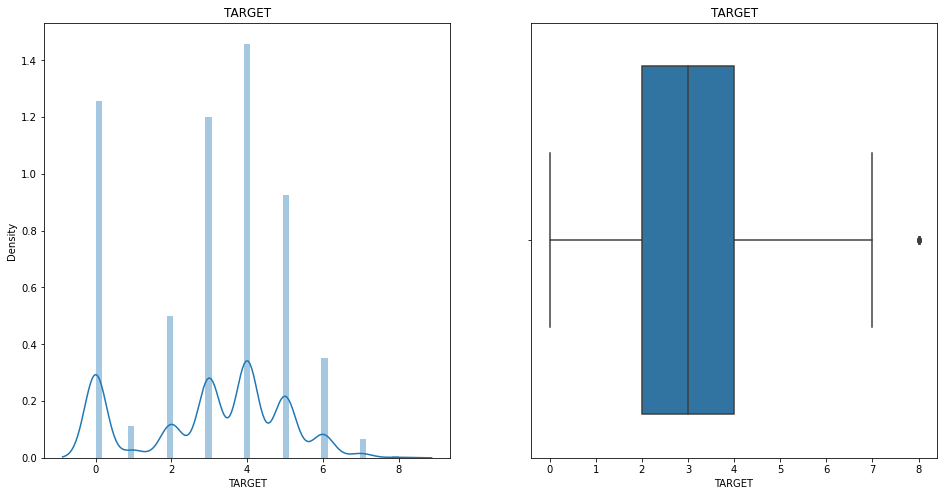

In [7]:

#Create a histogram and boxplot side by side
i= df.TARGET
sns.set_style();
plt.figure(figsize=(16,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('TARGET')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i);#calls a boxplot
plt.title('TARGET');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symetry)value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread
i.describe() #Adds summary statistics of the variable

* Modality: Bimodal with peaks around 0 and 4
* Distribution: Left Skewed
* Outliers: One to the right


In [8]:
#checking counts of outlier
df['TARGET'].value_counts()

4    3177
0    2734
3    2611
5    2014
2    1091
6     765
1     244
7     142
8      17
Name: TARGET, dtype: int64

Discussion: It seems like many wines from this datset are not tried, and the rest are normally distributed. Wines ordered 8 times may be an outlier, through it does trail off from wine ordered 7 times. ??SHOULD THIS DATA BE TRANSFORMED??

#### FixedAcidity


Skewness: 1.174556


count    12795.000000
mean         8.063251
std          4.996119
min          0.000000
25%          5.600000
50%          7.000000
75%          9.800000
max         34.400000
Name: FixedAcidity, dtype: float64

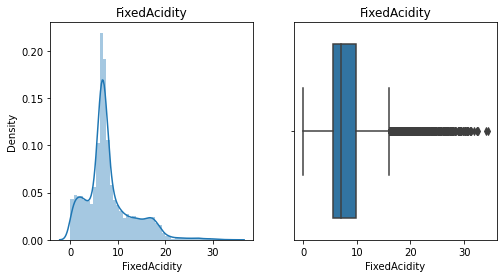

In [9]:
#Create a histogram and boxplot side by side for FixedAcidity
i= df.FixedAcidity

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('FixedAcidity')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('FixedAcidity');
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

* Modality: Unimodal
* Distribution: right skewed
* Outliers: Many to the right

Discussion:
This may benefit from a transformation to make the distribution more gausian.

#### VolatileAcidity


Skewness: 1.653366


count    12795.000000
mean         0.641086
std          0.555614
min          0.000000
25%          0.250000
50%          0.410000
75%          0.910000
max          3.680000
Name: VolatileAcidity, dtype: float64

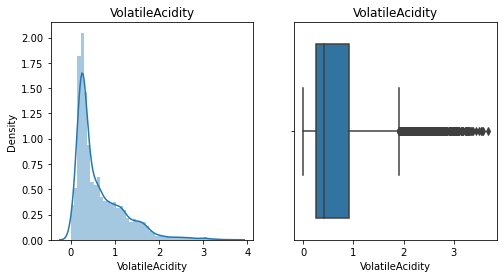

In [10]:
#Create a histogram and boxplot side by side for VolatileAcidity
i= df.VolatileAcidity

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('VolatileAcidity')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('VolatileAcidity');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

VolatileAcidity is a continuous variable with no missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion
This could also benefit from a transformation to make it more guasian.

#### CitricAcid

Skewness: 1.643195


count    12795.000000
mean         0.686315
std          0.606005
min          0.000000
25%          0.280000
50%          0.440000
75%          0.970000
max          3.860000
Name: CitricAcid, dtype: float64

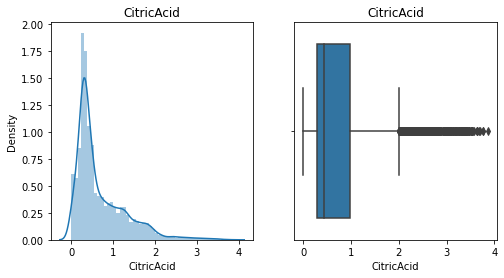

In [11]:
#Create a histogram and boxplot side by side for CitricAcid
i= df.CitricAcid

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('CitricAcid')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('CitricAcid');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

CitricAcid is a continuous variable with no missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion:

This may also benefit from a transformation

#### ResidualSugar


Skewness: 1.469162


count    12179.000000
mean        23.367809
std         24.945667
min          0.000000
25%          3.600000
50%         12.900000
75%         38.700000
max        141.150000
Name: ResidualSugar, dtype: float64

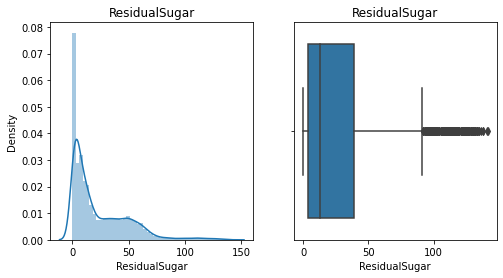

In [12]:
#Create a histogram and boxplot side by side for ResidualSugar
i= df.ResidualSugar

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('ResidualSugar')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('ResidualSugar');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable


ResidualSugar is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

There is some missing data here which will need to be addressed, and the distplot may benefit from a transformation


#### Chlorides


Skewness: 1.481147


count    12157.000000
mean         0.222559
std          0.234288
min          0.000000
25%          0.046000
50%          0.098000
75%          0.368000
max          1.351000
Name: Chlorides, dtype: float64

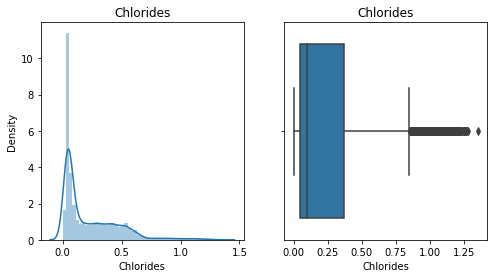

In [13]:
#Create a histogram and boxplot side by side for Chlorides
i= df.Chlorides

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Chlorides')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Chlorides');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Chlorides is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion
There is some missing data here which will need to be addressed, and the distplot may benefit from a transformation

#### FreeSulfurDioxide

Skewness: 1.530134


count    12148.000000
mean       106.679042
std        108.102694
min          0.000000
25%         28.000000
50%         56.000000
75%        172.000000
max        623.000000
Name: FreeSulfurDioxide, dtype: float64

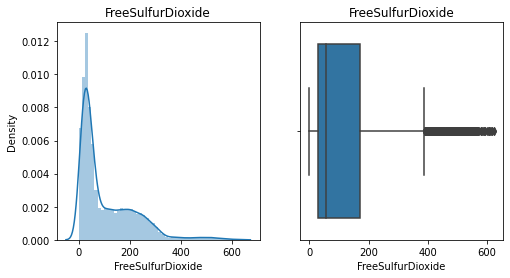

In [14]:
#Create a histogram and boxplot side by side for FreeSulfurDioxide
i= df.FreeSulfurDioxide

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('FreeSulfurDioxide')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('FreeSulfurDioxide');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

FreeSulfurDioxide is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

There is some missing data here which will need to be addressed, and the distplot mya benfit from a transformation

#### TotalSulfurDioxide

Skewness: 1.611275


count    12113.000000
mean       204.319120
std        163.116881
min          0.000000
25%        100.000000
50%        154.000000
75%        262.000000
max       1057.000000
Name: TotalSulfurDioxide, dtype: float64

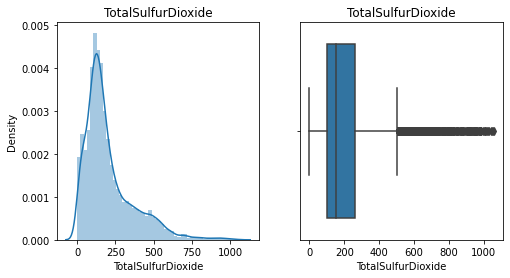

In [15]:
#Create a histogram and boxplot side by side for TotalSulfurDioxide
i= df.TotalSulfurDioxide

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('TotalSulfurDioxide')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('TotalSulfurDioxide');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

TotalSulfurDioxide is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

There is some missing data here which will need to be addressed, and the distplot may benefit from a transformation
Because of the scale of this variable, it may also benefit our model to normalize the values, to prevent an outsised effect

####  Density


Skewness: -0.018698


count    12795.000000
mean         0.994203
std          0.026538
min          0.888090
25%          0.987720
50%          0.994490
75%          1.000515
max          1.099240
Name: Density, dtype: float64

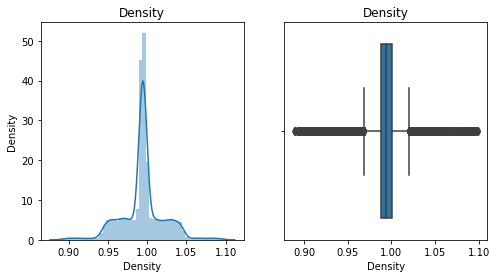

In [16]:
#Create a histogram and boxplot side by side for Density
i= df.Density

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Density')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Density');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Density is a continuous variable with no missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: many on both sides

Discussion: 
There is some missing data here which will need to be addressed, otherwise it looks fine.


#### pH

Skewness: 0.044299


count    12400.000000
mean         3.207628
std          0.679687
min          0.480000
25%          2.960000
50%          3.200000
75%          3.470000
max          6.130000
Name: pH, dtype: float64

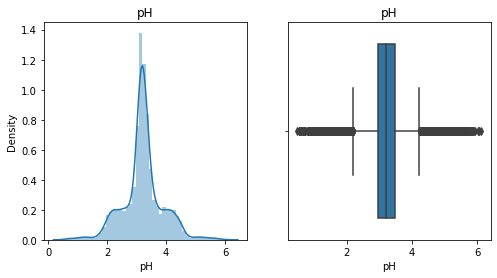

In [17]:
#Create a histogram and boxplot side by side for pH
i= df.pH

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('pH')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('pH');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

pH is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: some missing values

Discussion
There are some null values here, but more importantly, the outliers are of concern. Lemon Juice has a pH of 2, which is very acidic. it seams unlikely that wines have a true pH less than 2, making me suspect something was wrong with the measurement. Ditto values above 4.6, which are hard to preserve according to the Department of Food Science*

*https://fbns.ncsu.edu//extension_program/documents/acidified_formulating_dressings.pdf

#### Sulphates


Skewness: 1.691810


count    11585.000000
mean         0.846668
std          0.655612
min          0.000000
25%          0.430000
50%          0.590000
75%          1.100000
max          4.240000
Name: Sulphates, dtype: float64

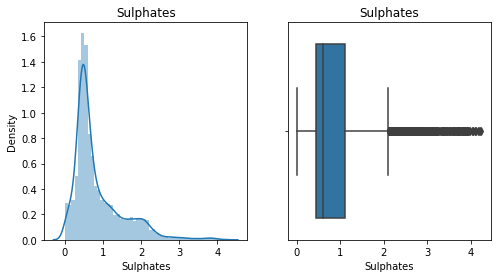

In [18]:
#Create a histogram and boxplot side by side for Sulphates
i= df.Sulphates

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Sulphates')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Sulphates');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Sulphates is a continuous variable with many missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

Has null values that need to be imputed, and may benefit from being transformed

#### Alcohol

Skewness: 0.182591


count    12142.000000
mean        10.523778
std          3.629154
min          0.000000
25%          9.000000
50%         10.400000
75%         12.400000
max         26.500000
Name: Alcohol, dtype: float64

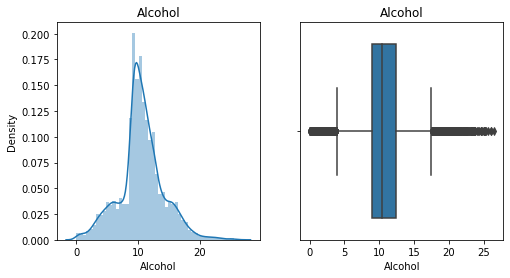

In [19]:
#Create a histogram and boxplot side by side for Alcohol
i= df.Alcohol

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Alcohol')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Alcohol');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Alchohol is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: many on both sides

Discussion

There are missing values here. Also, some of the values violate the FAA definitions; "Wine is defined in the Federal Alcohol Administration Act (FAA Act) as, among other things, containing not less than 7 and not more than 24 percent alcohol by volume."*

https://www.fda.gov/regulatory-information/search-fda-guidance-documents/cpg-sec-510400-dealcoholized-wine-and-malt-beverages-labeling


#### LabelAppeal


Skewness: 0.008431


count    12795.000000
mean        -0.009066
std          0.891089
min         -2.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: LabelAppeal, dtype: float64

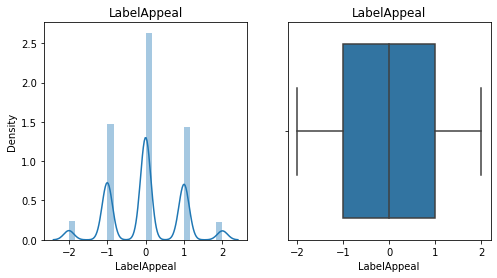

In [20]:
#Create a histogram and boxplot side by side for LabelAppeal
i= df.LabelAppeal

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('LabelAppeal')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('LabelAppeal');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

LabelAppeal is a categroical variable with no missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: None

Discussion \\
No changes necessary


#### AcidIndex

Skewness: 1.648883


count    12795.000000
mean         7.772724
std          1.323926
min          4.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         17.000000
Name: AcidIndex, dtype: float64

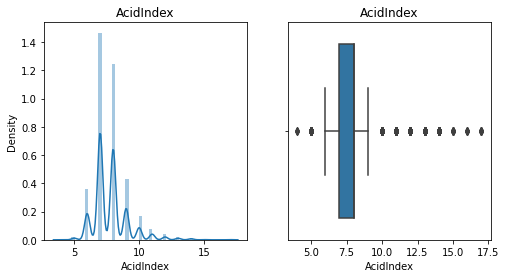

In [21]:
#Create a histogram and boxplot side by side for AcidIndex
i= df.AcidIndex

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('AcidIndex')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('AcidIndex');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

LabelAppeal is a actegroical variable with no missing values
* Modality: Unimodal
* Distribution: Right Skewed
* Outliers: Some on both sides, more to the right

Discussion
The outliers are regular. It seems like this is a weighted index, so we should turn this into a series of dummy vaiables

#### STARS

Skewness: 0.447378


count    9436.000000
mean        2.041755
std         0.902540
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: STARS, dtype: float64

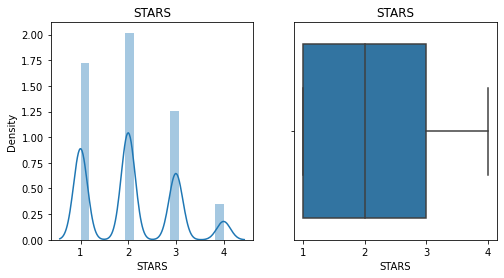

In [22]:
#Create a histogram and boxplot side by side for STARS
i= df.STARS

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('STARS')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('STARS');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

STARS is a categorical variable with many missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: None

Discussion:

Maybe we can assume all missing values are 0 stars? see how that affects correlation and skewness etc

### Correlation Analysis

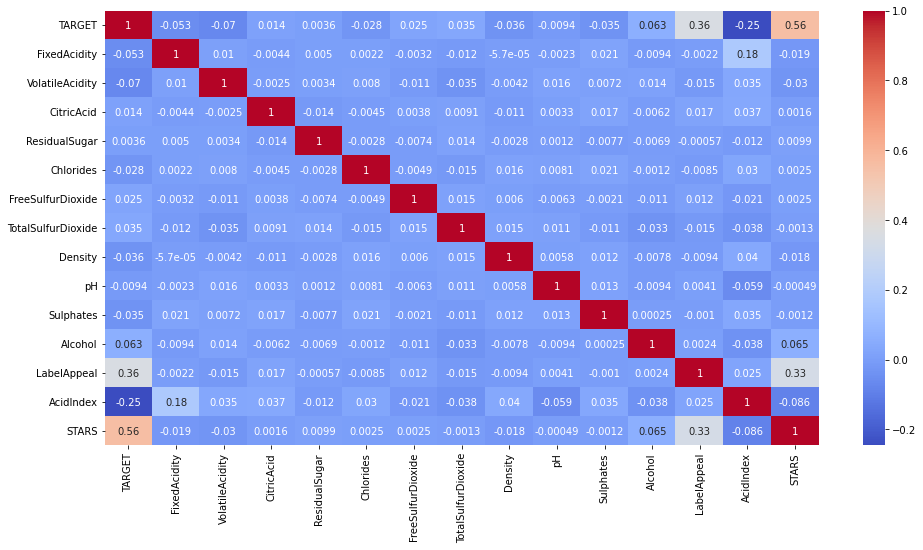

In [23]:
dfc = df.iloc[:, 2:]
plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
sns.heatmap(dfc.corr(),cmap='coolwarm',annot=True);

## Data Preparation <a id='2'></a>
1. handle nulls or bad data: have you deleted any observations? Used imputation to fill missing data values?
 * svd or other model based approach?

2. dummy variables or other categoryial transofrmations
3. Transform
 1. interaction features
 2. handle sparse classes
 3. drop features
  * colinear features 
  * drop none helpful features
  



----- Using your Python skills, perform appropriate data preparation tasks relative to the data integrity + usability issues you identified via your EDA work. Describe the ways in which you have transformed / prepared the data for use within a machine learning algorithm, e.g., have you deleted any observations? Used imputation to fill missing data values? **Created any new variables**? **Transformed data distributions via mathematical transforms (e.g., Box-Cox, logarithms, etc.) or binningto make the data more “usable”for model training?** etc. Be sure to explain your justification for each adjustment you have made to the data. ---------
###Examine Null Values for Patterns

In [24]:
#create a dataframe to easily view missing values
df_null = df[df.columns[~df.notnull().all()]]
df_null.describe()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
count,12179.000000,12157.000000,12148.000000,12113.000000,12400.000000,11585.000000,12142.000000,9436.000000
mean,23.367809,0.222559,106.679042,204.319120,3.207628,0.846668,10.523778,2.041755
std,24.945667,0.234288,108.102694,163.116881,0.679687,0.655612,3.629154,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.480000,0.000000,0.000000,1.000000
25%,3.600000,0.046000,28.000000,100.000000,2.960000,0.430000,9.000000,1.000000
50%,12.900000,0.098000,56.000000,154.000000,3.200000,0.590000,10.400000,2.000000
75%,38.700000,0.368000,172.000000,262.000000,3.470000,1.100000,12.400000,3.000000
max,141.150000,1.351000,623.000000,1057.000000,6.130000,4.240000,26.500000,4.000000


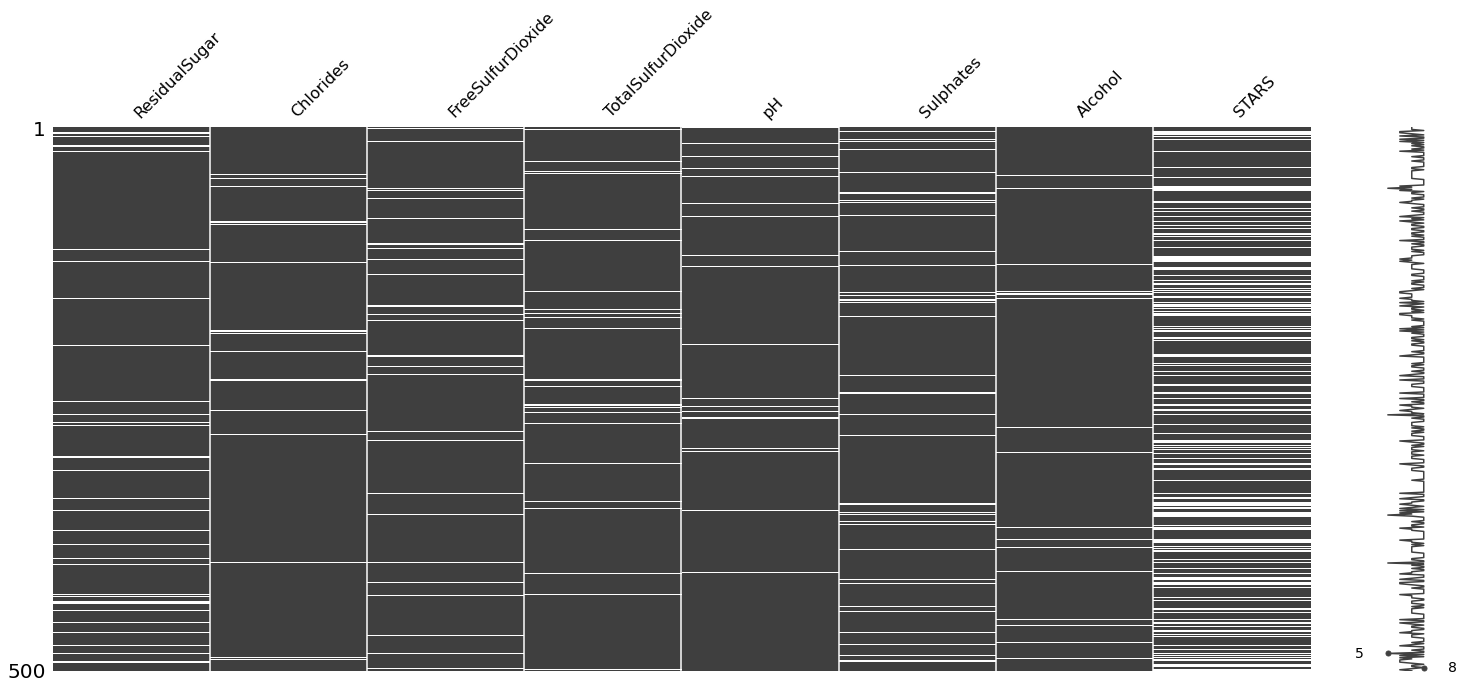

In [25]:
#to see if there are any patterns we can fix in the missing data we will utlize the missingno library 
ax = msno.matrix(df_null.sample(500))


There doesn't seem to be any pattern to the missing values. 

In [26]:
#let's check the percent of missing data 
df_null.isnull().mean() * 100

ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
STARS                 26.252442
dtype: float64

### Null Impute
We'll now turn toward filling in missing data. Our first step will be to create a new dataframe that we can attempt to transform, while preserving the initial dataset in case it is needed later.

In [27]:
#create a new datafram that we will modify values of, leaving the original in place to compare against
df_prep = df
df_prep.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')#drop column as it holds no value for us. 
df_prep.drop(['INDEX'], axis=1, inplace=True, errors='ignore')
df_prep.head()
df_prep.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


If we impute a variable missing more than 10% of its records, the risk to biasing the feature as a whole increases. The only variable we have to worry about in this regard is STARS. Let us take a closer look at this feature now to see what we can do.

Skewness: 0.447378


count    9436.000000
mean        2.041755
std         0.902540
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: STARS, dtype: float64

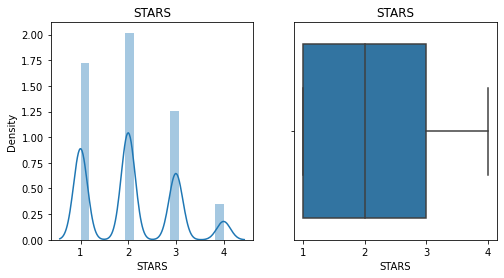

In [28]:
#
i= df.STARS

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('STARS')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('STARS');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

#### fillna
We can see that none of the wines were rated 5 stars, adn none were rated 0 stars. We can also see from above that the review system is correlated with the ammount of wine purchased. Although We are not a subject matter expert (and we would consult an SME and the originators of the data to double check) we believe replacing missing values with a 0 value will fix our null data problem without affecting our model unduly. The theory we are working under is that people search for high rated wines, and then purchase from that list. If the wine producer has not submited their wine to independet ratings, it will also have a lower marketing budget, and be less purchased. This featur may benefit from a dummy variable, but we do not have the time to finish that Feature Engineering here.

 

In [29]:
df_prep['STARS'].fillna(0, inplace = True)
df_prep.head(10)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,0.98,54.20,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.160,0.81,26.10,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,0.88,14.80,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.80,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,1.26,9.40,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
5,0,11.3,0.320,0.59,2.20,0.556,37.0,15.0,0.99940,3.20,1.29,15.4,0,11,0.0
6,0,7.7,0.290,0.40,21.50,0.060,287.0,156.0,0.99572,3.49,1.21,10.3,0,8,0.0
7,4,6.5,1.220,0.34,1.40,0.040,523.0,551.0,1.03236,3.20,NaN,11.6,1,7,3.0
8,3,14.8,0.270,1.05,11.25,0.007,213.0,NaN,0.99620,4.93,0.26,15.0,0,6,0.0
9,6,5.5,0.220,0.39,1.80,0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0


Skewness: 0.254900


count    12795.000000
mean         1.505744
std          1.186538
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: STARS, dtype: float64

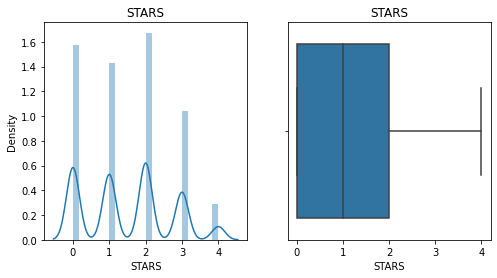

In [30]:
i= df_prep.STARS

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(i); 
plt.title('STARS')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(i);
plt.title('STARS');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

The skew decreased with this imputation, which is generally good for predictive models. Though the standard deviation increased, it is slight, and expected when adding an extra value past the previous minimum. It doesnt seem to have shifted the boxplot, so I belive we can call this a success!

The remaining features are all continuous and have fewer than 10% of their values missing. They are good candidates for an imputation method. Univariate imputation is forwned upon when multi-variate imputation is available, though knowing which method to chose can be confusing. Here we will try using the K-Nearest-Neighbor method and the IterativeImputer and use a regression model to identify which has better performance. We will start with a simple imputer using the median value though, to demonstrate the priciple, and give us something to compare against.

#### Simple Imputer

In [31]:
#split response variable from data set so we do not leak data in imputation
df_simple = df_prep.values#changing this to a numpy array in order to impute
X_simple = df_simple[:,1:]#all rows, everything but the response variable
y_simple = df_simple[:,0]#all rows, only the first column (response variable)
X_simple

array([[ 3.2 ,  1.16,  0.98, ...,  0.  ,  8.  ,  2.  ],
       [ 4.5 ,  0.16,  0.81, ..., -1.  ,  7.  ,  3.  ],
       [ 7.1 ,  2.64,  0.88, ..., -1.  ,  8.  ,  3.  ],
       ...,
       [ 6.  ,  0.17,  1.1 , ...,  0.  ,  6.  ,  2.  ],
       [ 7.7 ,  0.32,  0.12, ..., -1.  ,  6.  ,  2.  ],
       [ 5.2 ,  0.04,  0.81, ...,  0.  ,  7.  ,  2.  ]])

In [32]:
y_simple

array([3., 3., 5., ..., 4., 3., 4.])

now we need to split into a test/training set. first impute training set then the test set in order to prevent leaking data from the training set to the testing sest. 

In [33]:
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y_simple, 
                                                                                test_size=0.2,#%20 is a commontest set, which is big enough to be representative, while allowing enough for training
                                                                                random_state=42)

In [34]:
# imputer from sklearn.impute simple imputer 
imputer_median = SimpleImputer(missing_values = np.nan, strategy ='median')#Simple Imputer which replaces missing values with the median of the column. Always choose Median over Mean to prevent Skewing
imputer_median.fit(X_simple_train)#first train the imputer only on training data, not testing or vaildating to prevent data leak


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [35]:
#we can now transform the training set and testing set with the median calculated from only the training set, preventing data leakage
X_simple_train = imputer_median.transform(X_simple_train)
X_simple_test  = imputer_median.transform(X_simple_test)

In [36]:
#sanity check to see if any values are missing
'Missing: {}'.format(sum(np.isnan(X_simple_train).flatten()))

'Missing: 0'

In [37]:
#Now testing
model = LinearRegression()# model chosen as an example, not specifically meaningful here

# fit the model using 10-fold cross validation. WHY 10 FOLDS?!?!?!?!?!!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?!?
scores = cross_val_score(model, X_simple_train, y_simple_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.53126077 0.4854879  0.50316036 0.5345579  0.51074556 0.54707103
 0.51390665 0.56000699 0.54156149 0.52996627]
0.5257724932269527


#### KNN vs IterativeImputer

In [38]:
#split response variable from data set so we do not leak data in imputation?
df_knn = df_prep.values #changing this to a numpy array in order to impute
X_knn = df_knn[:,1:]#all rows, everything but the response variable
y_knn = df_knn[:,0]#all rows, only the first column (response variable)

In [39]:
# Now split the data into training and testing subsets. 
# set aside 20% of the data for testing purposes, specifying a value for the inital random_state WHY 20?!?!?!?!
# to have the ability to reproduce the exact same training + testing subsets repeatedly
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [40]:
# source: https://www.youtube.com/watch?v=m_qKhnaYZlc
#simple imbputer is univariate. knn (most similar rows) and iterative (regression model) imputer are multivariate, so should give better impution

impute_knn = KNNImputer(n_neighbors=2)#why 2?!??!?!?!?!?!?!?!?!?!?!?!?!?
X_knn_train = impute_knn.fit_transform(X_knn_train)#fiting on the training data first to prevent data leak to test set. the fit_transform method is a combination of fit() and transform()
X_knn_test  = impute_knn.transform(X_knn_test)

In [41]:
# The training set will be divided into 10 folds for K-fold cross-validation based on generalized experimentation suggestion.
# Each fold will have a chance to be the validation fold to assess the accuracy. Total 10 times. Then the final accuracy will be calculated as the mean value of each validation accuracy.
scores = cross_val_score(model, X_knn_train, y_knn_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.53116604 0.48538574 0.50296267 0.53448029 0.51045718 0.54737075
 0.51375696 0.56014641 0.54200806 0.53063032]
0.5258364420551509


In [42]:
#split response variable from data set so we do not leak data in imputation?
df_itim = df_prep.values #changing this to a numpy array in order to impute
X_itim = df_itim[:,1:]#all rows, everything but the response variable
y_itim = df_itim[:,0]#all rows, only the first column (response variable)

X_itim_train, X_itim_test, y_itim_train, y_itim_test = train_test_split(X_itim, y_itim, test_size=0.2, random_state=42)

impute_it = IterativeImputer()
X_itim_train = impute_it.fit_transform(X_itim_train)
X_itim_test  = impute_knn.transform(X_itim_test)
# The training set will be divided into 10 folds for K-fold cross-validation based on generalized experimentation suggestion.
# Each fold will have a chance to be the validation fold to assess the accuracy. Total 10 times. Then the final accuracy will be calculated as the mean value of each validation accuracy.
scores = cross_val_score(model, X_itim_train, y_itim_train, cv=10)
# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.53117284 0.48555308 0.50318568 0.5345238  0.51088579 0.54724131
 0.51373576 0.56015641 0.54171478 0.52999502]
0.5258164470057627


It looks like none of the models are all that different from each other. This may be because many of the values are skewed, and training models benefit from bell shaped data. Let's now turn toward noarmalizing these features, before revisiting machine learning models. I chose Linear Regression above, but there is no free lunch after all.At this point, I will stop applying ML functions and building Models. It is helpful to understand how our changes can affect models, but it is outside the scope of this assignment.

In [43]:
#sanity check to see if any values are missing
df_prep.isnull().mean() * 100

TARGET                0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         4.814381
Chlorides             4.986323
FreeSulfurDioxide     5.056663
TotalSulfurDioxide    5.330207
Density               0.000000
pH                    3.087143
Sulphates             9.456819
Alcohol               5.103556
LabelAppeal           0.000000
AcidIndex             0.000000
STARS                 0.000000
dtype: float64

In [44]:
a = impute_it.fit_transform(df_prep)
df_prep = pd.DataFrame(a, columns = ['TARGET','FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides',
                                           'FreeSulfurDioxide','TotalSulfurDioxide','Density','pH','Sulphates','Alcohol',
                                           'LabelAppeal','AcidIndex','STARS'])


In [45]:
#sanity check to see if any values are missing
df_prep.isnull().mean() * 100

TARGET                0.0
FixedAcidity          0.0
VolatileAcidity       0.0
CitricAcid            0.0
ResidualSugar         0.0
Chlorides             0.0
FreeSulfurDioxide     0.0
TotalSulfurDioxide    0.0
Density               0.0
pH                    0.0
Sulphates             0.0
Alcohol               0.0
LabelAppeal           0.0
AcidIndex             0.0
STARS                 0.0
dtype: float64

### Transform Data

Notes on Transforming Skewed Data


Square Root: 

> The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is  a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

Logarithmic:

> The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.

Box Cox:

> The Box-Cox transformation is, as you probably understand, also a technique to transform non-normal data into normal shape. This is a procedure to identify a suitable exponent (Lambda = l) to use to transform skewed data.*

Yeo-Johnson:

>Similar supports both positive or negative data.

https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

In [46]:
#first we will quickly loop over the dataframe to remind ourselves which of our feaures are skewed
for (columnName, columnData) in df_prep.iteritems():
  if columnData.abs().skew() > 1:
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.skew())

Column Name :  FixedAcidity
Column Contents :  1.1745560033933498
Column Name :  VolatileAcidity
Column Contents :  1.6533658263962545
Column Name :  CitricAcid
Column Contents :  1.6431953805614938
Column Name :  ResidualSugar
Column Contents :  1.5058275814316837
Column Name :  Chlorides
Column Contents :  1.5195117151378186
Column Name :  FreeSulfurDioxide
Column Contents :  1.570293540686983
Column Name :  TotalSulfurDioxide
Column Contents :  1.6550298102666516
Column Name :  Sulphates
Column Contents :  1.7772793125932413
Column Name :  AcidIndex
Column Contents :  1.6488825330155508


In [47]:
#refreshing ourselves on the scale and attributes of our skewed columns
df_prep[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides',
        'FreeSulfurDioxide','TotalSulfurDioxide','Sulphates','AcidIndex']].describe()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Sulphates,AcidIndex
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000
mean,8.063251,0.641086,0.686315,23.367862,0.222553,106.680349,204.339653,0.846742,7.772724
std,4.996119,0.555614,0.606005,24.337802,0.228375,105.334102,158.728174,0.623877,1.323926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,5.600000,0.250000,0.280000,4.000000,0.046000,29.000000,102.000000,0.450000,7.000000
50%,7.000000,0.410000,0.440000,14.200000,0.120000,61.000000,160.000000,0.640000,8.000000
75%,9.800000,0.910000,0.970000,37.200000,0.353000,164.000000,251.000000,1.000000,8.000000
max,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,4.240000,17.000000


starting with LOG FixedAcidity because why not?

  jacob - the simplest way to log trans form is just to start by taking the natural log of the column if that doesn't get you what you want then log 10 

difference between BOXCOX and LOG transformations?
  alan - BoxCox may be a better fit in our scenario. We want to make our feature more gausian to benefit our predictive models and reduce outliers. While log can help with that, Box-Cox also standardizes the features, preventing the Sulfur Dioxide columns having an outsized wheight. Our data also fit the positive values requirement of BoxCox

#### FixedAcidity

In [48]:
df_fa = df_prep['FixedAcidity']#define a new dataframe that we can play around with, without messing up our work so far
df_fa = np.log10(df_fa)#natural log and log10 were attempted, but resulted in infinite values
df_fa.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1.279500e+04
mean             -inf
std               NaN
min              -inf
25%      7.481880e-01
50%      8.450980e-01
75%      9.912261e-01
max      1.536558e+00
Name: FixedAcidity, dtype: float64

We tried logarythmic transformations (natural log was also attempted) without much success. Infinite values will not help us in Machine Learning. We will now toward the BoxCox scaler, which can help normalize values.

> Indented block



In [49]:
df_fa = df_prep['FixedAcidity']#repairing our dataframe
df_fa.head()#sanity check

0    3.2
1    4.5
2    7.1
3    5.7
4    8.0
Name: FixedAcidity, dtype: float64

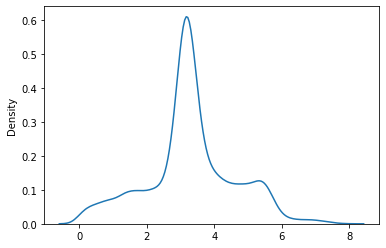

In [50]:
a = df_fa + 1#The BoxCox transformation requires positive values. Adding 1 ensures the 0 values to not prevent the function from working
transformed_data, best_lambda = boxcox(a)# transform training data & save lambda value

sns.distplot(transformed_data, hist=False, kde=True)#plot the distribution of the transformed data values

In [51]:
df_prep['FixedAcidity'] = transformed_data#moves transformed data back into the dataframe we are preparing

We later learned that log transformations also require non-zero values, but we already have a working transformation.

#### VolatileAcidity

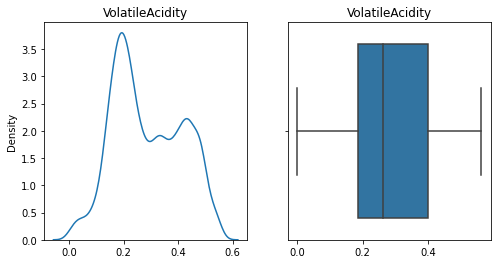

In [52]:
a = df_prep['VolatileAcidity'] + 1#The BoxCox transformation requires positive values. Adding 1 ensures the 0 values to not prevent the function from working
transformed_data, best_lambda = boxcox(a)# transform training data & save lambda value

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(transformed_data, hist=False, kde=True);#plot the distribution of the transformed data values
plt.title('VolatileAcidity')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(transformed_data);#plot the distribution of the transformed data values
plt.title('VolatileAcidity');

In [53]:
df_prep['VolatileAcidity'] = transformed_data#moves transformed data back into the dataframe we are preparing

#### CitricAcid

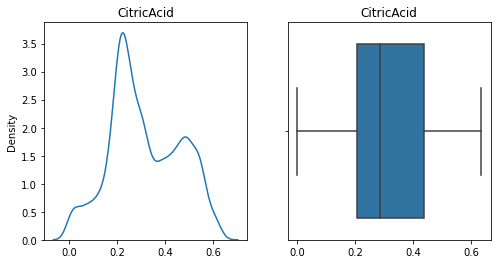

In [54]:
a = df_prep['CitricAcid'] + 1#The BoxCox transformation requires positive values. Adding 1 ensures the 0 values to not prevent the function from working
transformed_data, best_lambda = boxcox(a)# transform training data & save lambda value

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(transformed_data, hist=False, kde=True);#plot the distribution of the transformed data values
plt.title('CitricAcid')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(transformed_data);#plot the distribution of the transformed data values
plt.title('CitricAcid');

In [55]:
df_prep['CitricAcid'] = transformed_data#moves transformed data back into the dataframe we are preparing

#### ResidualSugar

To handle of the skewness of the residualsugar attribute we will normalize it. 
because residualsugar is on the boarder between the levels of skewd'd ness defined above we we utlize multiple techniques:  

**steps:**  
1. since most normilization techinques have issues with 0 and our min value is 0 we will add +1 to the entire set.
2. normalization techinques tried
  1. boxcox - 
  2. square root - 
  3. log transform
3. we will add our best transformaiton back to the prepared dataframe



##### Box-Cox Transform

,ResidualSugar
count,12795.000000
mean,2.995613
std,1.416250
min,0.000000
25%,1.719226
50%,3.045039
75%,4.238257
max,6.101634


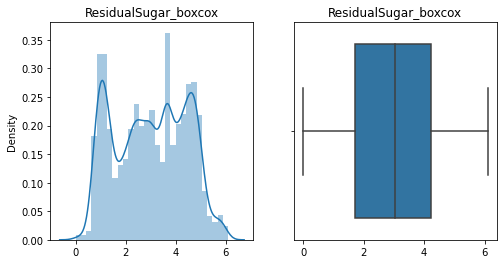

In [56]:
a = df_prep['ResidualSugar'] + 1#The BoxCox transformation requires positive values. Adding 1 ensures the 0 values to not prevent the function from working
transformed_data, best_lambda = boxcox(a)# transform training data & save lambda value

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(transformed_data, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('ResidualSugar_boxcox')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(transformed_data);#plot the distribution of the transformed data values
plt.title('ResidualSugar_boxcox');
pd.DataFrame(transformed_data,columns=['ResidualSugar']).describe()

ResidualSugar didn't like a BoxCox Transformation at all.   
next we will try a sqrt transformation

##### Square Root Transform

count    12795.000000
mean         4.348198
std          2.336978
min          1.000000
25%          2.236068
50%          3.898718
75%          6.180615
max         11.922667
Name: ResidualSugar, dtype: float64

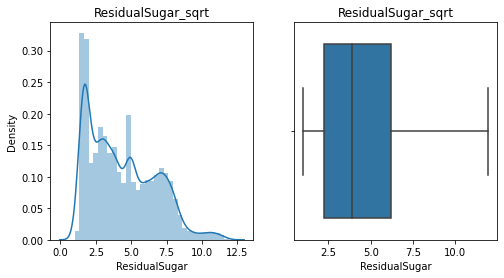

In [57]:
sqrt_a = a.apply(np.sqrt) # using the same +1 transformed data for conistancy we 

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(sqrt_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('ResidualSugar_sqrt')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(sqrt_a);#plot the distribution of the transformed data values
plt.title('ResidualSugar_sqrt');
sqrt_a.describe()

Square root transformation was signifigantly better in normalizing but still not evenly distributed/normally distributed mean 4.1 median 3.6 

our final transformation will be a 

##### Log Transform

count    12795.000000
mean         2.628410
std          1.148335
min          0.000000
25%          1.609438
50%          2.721295
75%          3.642836
max          4.956883
Name: ResidualSugar, dtype: float64

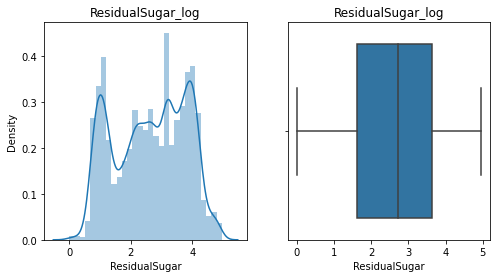

In [58]:
log_a = a.apply(np.log) #natural log and log10 were attempted with simmilar results
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(log_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('ResidualSugar_log')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(log_a);#plot the distribution of the transformed data values
plt.title('ResidualSugar_log');
log_a.describe()

log appears to do the best job of normalizing the distribution we will add it back to df prep.

##### adding back to df_prep

In [59]:
df_prep['ResidualSugar'] = log_a

#### Chlorides

To handle of the skewness of the Chlorides attribute we will normalize it. 

**steps:**  
1. since most normilization techinques have issues with 0 and our min value is 0 we will add +1 to the entire set.
2. normalization techinques tried
  1. box-cox - 
  2. square root - 
  3. log transform
3. we will add our best transformaiton back to the prepared dataframe



##### Box-Cox Transform

count    12795.000000
mean         4.348198
std          2.336978
min          1.000000
25%          2.236068
50%          3.898718
75%          6.180615
max         11.922667
Name: ResidualSugar, dtype: float64

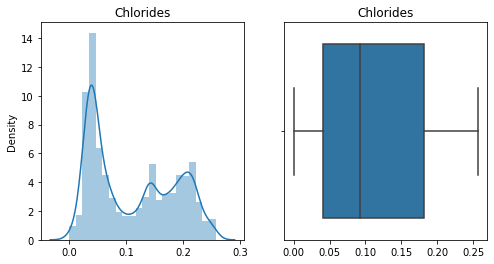

In [60]:
a = df_prep['Chlorides'] + 1#The Box-Cox transformation requires positive values. Adding 1 ensures the 0 values to not prevent the function from working
transformed_data, best_lambda = boxcox(a)# transform training data & save lambda value

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(transformed_data, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('Chlorides')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(transformed_data);#plot the distribution of the transformed data values
plt.title('Chlorides');
sqrt_a.describe()

the boxcox transformaion still is still signifigantly right skewed next we will try square root

##### Square Root Transform

count    12795.000000
mean         1.101348
std          0.097905
min          1.000000
25%          1.022741
50%          1.058301
75%          1.163185
max          1.533297
Name: Chlorides, dtype: float64

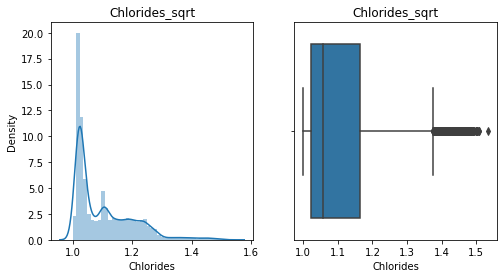

In [61]:
sqrt_a = a.apply(np.sqrt) # using the same +1 transformed data for conistancy we 

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(sqrt_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('Chlorides_sqrt')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(sqrt_a);#plot the distribution of the transformed data values
plt.title('Chlorides_sqrt');
sqrt_a.describe()

square root does a better job of handling outliers but not a complete job and their is still a right skew our final atempt will be with a log transform

##### Log Transform

count    12795.000000
mean         0.185659
std          0.169549
min          0.000000
25%          0.044973
50%          0.113329
75%          0.302324
max          0.854841
Name: Chlorides, dtype: float64

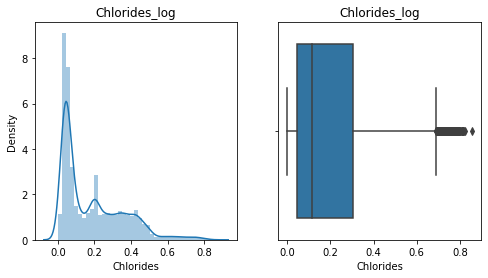

In [62]:
log_a = a.apply(np.log) #natural log 
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(log_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('Chlorides_log')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(log_a);#plot the distribution of the transformed data values
plt.title('Chlorides_log');
log_a.describe()

square root  appears to do the best job of normalizing the distribution as defined by comparing the mean and median we will add it back to df prep.

##### adding back to df_prep:

In [63]:
df_prep['Chlorides'] = sqrt_a

#### FreeSulfurDioxide 

Because of the scale and size of the outliers present here we will standardize this feature. depending on the effect will normalize them after. 

we will try two aproaches and select the best fit.

**steps**
 1. standardize 
   1. min max
   2. standard
 2. normalize
 3. 


##### StandardScaler

,scaler
count,1.279500e+04
mean,2.769409e-17
std,1.000039e+00
min,-1.012820e+00
25%,-7.374951e-01
50%,-4.336880e-01
75%,5.441912e-01
max,4.901925e+00


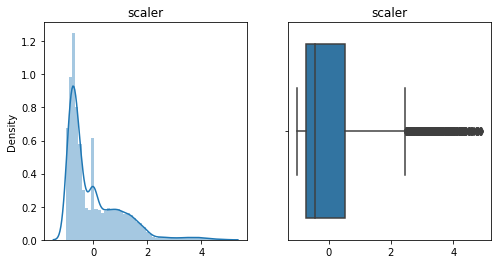

In [64]:
a = df_prep[['FreeSulfurDioxide']]
#scale data
sca = preprocessing.StandardScaler()
scaler = sca.fit_transform(a)

#plot output
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(scaler, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('scaler')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(scaler);#plot the distribution of the transformed data values
plt.title('scaler');
pd.DataFrame(scaler,columns=['scaler']).describe()

This doesn't seem like a good transformation for our purposes.
##### MinMax Scaler

,scaler
count,12795.000000
mean,0.171237
std,0.169076
min,0.000000
25%,0.046549
50%,0.097913
75%,0.263242
max,1.000000


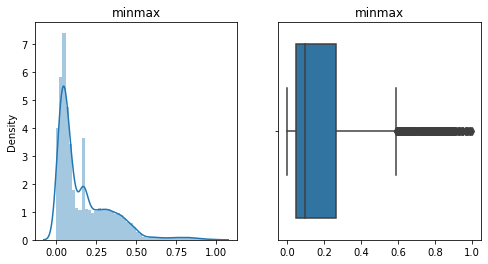

In [65]:
#create a column to perform transforms on 
a = df_prep[['FreeSulfurDioxide']]

#scale data 
min_max_scaler = MinMaxScaler() # initialize scaler
min_max_scaler = min_max_scaler.fit_transform(a) #fit scaler and scale data 

plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(min_max_scaler, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('minmax')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(min_max_scaler);#plot the distribution of the transformed data values
plt.title('minmax');
pd.DataFrame(min_max_scaler,columns=['scaler']).describe()

normalizing min max scaler


##### Box-Cox Transform

,scaler
count,12795.000000
mean,0.089310
std,0.055718
min,0.000000
25%,0.040934
50%,0.075502
75%,0.141397
max,0.203401


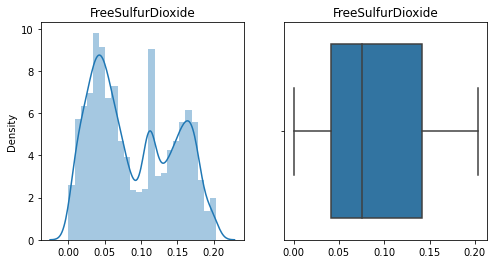

In [66]:
a = pd.DataFrame(min_max_scaler)[0]+1
transformed_data, best_lambda = boxcox(a)
# transform training data & save lambda value

plt.figure(figsize=(8,4))

plt.subplot(1,2,1);#Histogram
sns.distplot(transformed_data, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('FreeSulfurDioxide')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(transformed_data);#plot the distribution of the transformed data values
plt.title('FreeSulfurDioxide');
pd.DataFrame(transformed_data,columns=['scaler']).describe()

##### Square Root Transform

count    12795.000000
mean         1.079658
std          0.074672
min          1.000000
25%          1.023010
50%          1.047814
75%          1.123941
max          1.414214
Name: 0, dtype: float64

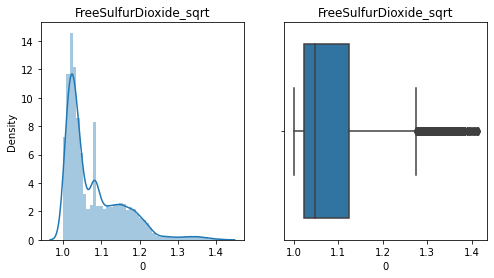

In [67]:
sqrt_a = a.apply(np.sqrt) # using the same +1 transformed data for conistancy we 

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(sqrt_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('FreeSulfurDioxide_sqrt')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(sqrt_a);#plot the distribution of the transformed data values
plt.title('FreeSulfurDioxide_sqrt');
sqrt_a.describe()

##### Log Transform

count    12795.000000
mean         0.148761
std          0.132793
min          0.000000
25%          0.045498
50%          0.093411
75%          0.233682
max          0.693147
Name: 0, dtype: float64

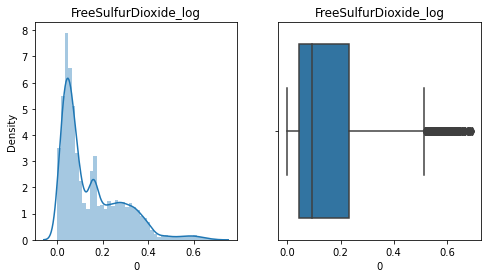

In [68]:
log_a = a.apply(np.log) #natural log 
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(log_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('FreeSulfurDioxide_log')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(log_a);#plot the distribution of the transformed data values
plt.title('FreeSulfurDioxide_log');
log_a.describe()

#####adding back to df_prep
The MinMax Standardized and subsequesnt BoxCox transformation yeilded the best shaped data, so we will add it back into our df_prep dataframe

In [69]:
df_prep['FreeSulfurDioxide'] = transformed_data

#### TotalSulfurDioxide

#####MinMax Scaler

,scaler
count,12795.000000
mean,0.193320
std,0.150169
min,0.000000
25%,0.096500
50%,0.151372
75%,0.237465
max,1.000000


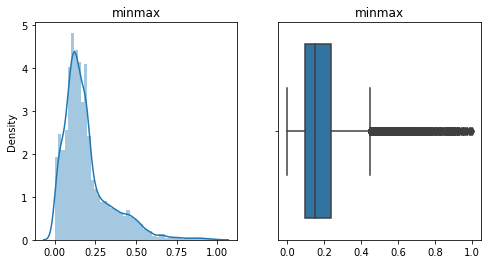

In [70]:
a = df_prep[['TotalSulfurDioxide']]
#scale data 
min_max_scaler = MinMaxScaler() # initialize scaler
min_max_scaler = min_max_scaler.fit_transform(a) #fit scaler and scale data 

plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(min_max_scaler, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('minmax')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(min_max_scaler);#plot the distribution of the transformed data values
plt.title('minmax');
pd.DataFrame(min_max_scaler,columns=['scaler']).describe()

#####Box-Cox Transform

,scaler
count,12795.000000
mean,0.110530
std,0.050968
min,0.000000
25%,0.076844
50%,0.107305
75%,0.142556
max,0.231371


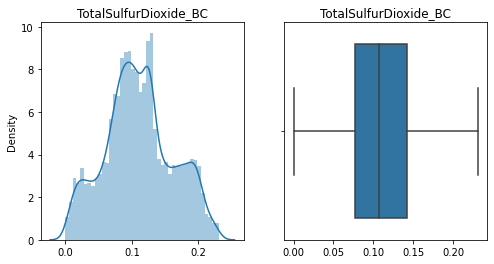

In [71]:
a = pd.DataFrame(min_max_scaler)[0]+1
transformed_data, best_lambda = boxcox(a)
# transform training data & save lambda value

plt.figure(figsize=(8,4))

plt.subplot(1,2,1);#Histogram
sns.distplot(transformed_data, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('TotalSulfurDioxide_BC')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(transformed_data);#plot the distribution of the transformed data values
plt.title('TotalSulfurDioxide_BC');
pd.DataFrame(transformed_data,columns=['scaler']).describe()

##### Square Root Transform

count    12795.000000
mean         1.090402
std          0.065910
min          1.000000
25%          1.047139
50%          1.073020
75%          1.112414
max          1.414214
Name: 0, dtype: float64

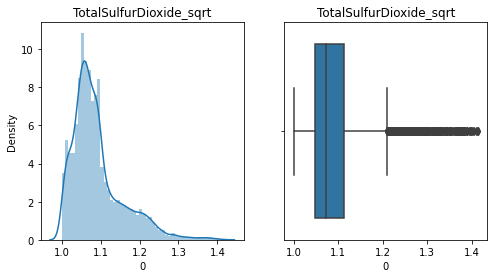

In [72]:
sqrt_a = a.apply(np.sqrt) # using the same +1 transformed data for conistancy we 

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(sqrt_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('TotalSulfurDioxide_sqrt')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(sqrt_a);#plot the distribution of the transformed data values
plt.title('TotalSulfurDioxide_sqrt');
sqrt_a.describe()

#####Log Transform

count    12795.000000
mean         0.169621
std          0.116410
min          0.000000
25%          0.092123
50%          0.140954
75%          0.213065
max          0.693147
Name: 0, dtype: float64

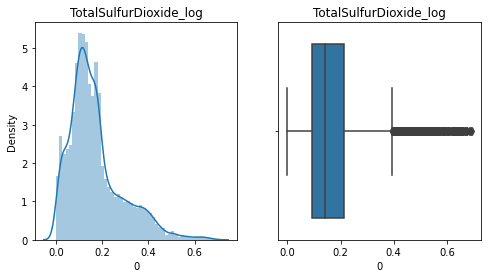

In [73]:
log_a = a.apply(np.log) #natural log 
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(log_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('TotalSulfurDioxide_log')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(log_a);#plot the distribution of the transformed data values
plt.title('TotalSulfurDioxide_log');
log_a.describe()

#####adding back to df_prep
The MinMax Standardized and subsequesnt BoxCox transformation yeilded the best shaped data, so we will add it back into our df_prep dataframe

In [74]:
df_prep['TotalSulfurDioxide'] = transformed_data

#### pH

In [75]:
df_prep['pH'].describe()

count    12795.000000
mean         3.207666
std          0.669144
min          0.480000
25%          2.970000
50%          3.200000
75%          3.450000
max          6.130000
Name: pH, dtype: float64

In [76]:
df_prep['pH'][(df_prep['pH'] < 2) | (df_prep['pH'] > 4.6)].count()

744

744 rows fall outside the definition of food. this is roughly 5.8% of the dataset. We believe that although this represents a non-trivial amount of data, it may not be worth including in our model. Therefore we recomend dropping the data or adding a dummy variable to indicate that this data may be bad.In our case, we will add a dummy variable.

#####Dummy Variables

In [77]:
df_prep['pHnotfood'] = np.where((df_prep['pH'] < 2) | (df_prep['pH'] > 4.6),True,False)

In [78]:
#sanity check
df_prep[ df_prep['pHnotfood'] == True].tail() 

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,pHnotfood
12681,5.0,2.866740,0.430855,0.133994,4.499810,1.258571,0.037175,0.084904,0.95721,4.61,1.22,10.0,0.0,6.0,2.0,True
12690,5.0,5.501803,0.080373,0.281271,0.875469,1.023230,0.030683,0.103536,1.02651,1.63,0.64,10.5,0.0,8.0,3.0,True
12692,0.0,3.391526,0.072309,0.268238,0.095310,1.004988,0.044596,0.211410,0.99440,0.61,1.79,8.9,0.0,8.0,0.0,True
12749,4.0,3.167410,0.151370,0.539636,0.500775,1.027132,0.195075,0.077436,1.03279,0.89,0.13,10.5,0.0,7.0,2.0,True
12750,3.0,0.797347,0.258686,0.140923,2.066863,1.016366,0.127798,0.059831,1.00397,1.81,1.56,9.4,0.0,7.0,0.0,True


#### Sulphates

#####Square Root Transform

count    12795.000000
mean         0.866322
std          0.310217
min          0.000000
25%          0.670820
50%          0.800000
75%          1.000000
max          2.059126
Name: Sulphates, dtype: float64

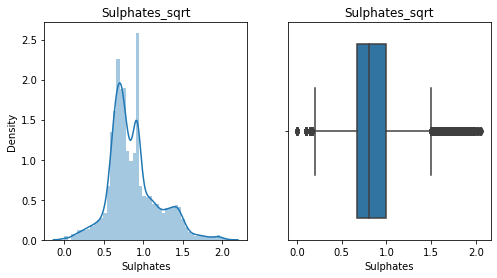

In [79]:
a = df_prep['Sulphates']
sqrt_a = a.apply(np.sqrt) # using the same +1 transformed data for conistancy we 

plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram
sns.distplot(sqrt_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('Sulphates_sqrt')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(sqrt_a);#plot the distribution of the transformed data values
plt.title('Sulphates_sqrt');
sqrt_a.describe()

#####Log Transform

count    12795.000000
mean         0.741533
std          0.045343
min          0.693147
25%          0.704454
50%          0.721881
75%          0.771582
max          0.929522
Name: Chlorides, dtype: float64

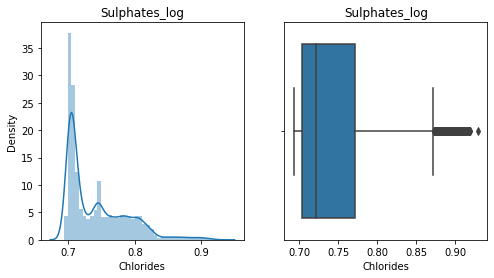

In [80]:
a = df_prep['Chlorides'] + 1#The Log transformation requires positive values. Adding 1 ensures the 0 values to not prevent the function from working
log_a = a.apply(np.log) #natural log 
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);#Histogram
sns.distplot(log_a, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('Sulphates_log')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(log_a);#plot the distribution of the transformed data values
plt.title('Sulphates_log');
log_a.describe()

#####Box-Cox Transform

,scaler
count,1.279500e+04
mean,6.884469e-02
std,8.056280e-07
min,6.884348e-02
25%,6.884392e-02
50%,6.884448e-02
75%,6.884547e-02
max,6.884631e-02


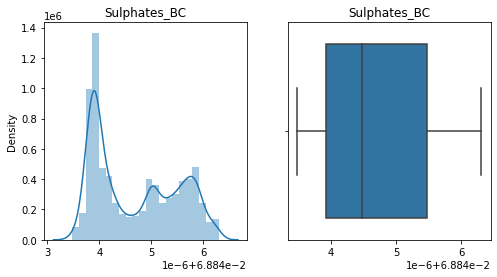

In [81]:
transformed_data, best_lambda = boxcox(a)
# transform training data & save lambda value

plt.figure(figsize=(8,4))

plt.subplot(1,2,1);#Histogram
sns.distplot(transformed_data, hist=True, kde=True);#plot the distribution of the transformed data values
plt.title('Sulphates_BC')
plt.subplot(1,2,2);#Boxplot
sns.boxplot(transformed_data);#plot the distribution of the transformed data values
plt.title('Sulphates_BC');
pd.DataFrame(transformed_data,columns=['scaler']).describe()

square root  appears to do the best job of normalizing the distribution, so we will add it back to the prep dataframe

##### adding back to df_prep:

In [82]:
df_prep['Sulphates'] = transformed_data

#### Alcohol

some of the values violate the FAA definitions; "Wine is defined in the Federal Alcohol Administration Act (FAA Act) as, among other things, containing not less than 7 and not more than 24 percent alcohol by volume." We will add a dummy column to indicate that this may be bad data. 
##### Dummy Variables

In [83]:
df_prep['Alcohol'][df_prep['Alcohol'] < 7].count()

1759

In [84]:
df_prep['Alcohol'][df_prep['Alcohol'] > 24].count()

20

There are only a few outliers that have above 24% alcohol, though there are _many_ that have less that 7%. I will create individual dummy vaiables for each set, hoping there is some signal in the noise.

##### Dummy Variables

In [85]:
#create dummies
df_prep['LowAlc'] = np.where(df_prep['Alcohol'] < 7,True,False)
#sanity check
df_prep[ df_prep['LowAlc'] == True].head() 

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,pHnotfood,LowAlc
3,3.0,2.835238,0.252423,0.038162,2.985682,1.193734,0.032004,0.084344,0.99640,2.24,0.068846,6.2,-1.0,6.0,1.0,False,True
12,3.0,2.928914,0.227846,0.454294,1.386294,1.232071,0.007844,0.175042,0.96643,3.55,0.068846,3.9,1.0,7.0,2.0,False,True
15,0.0,2.835238,0.296286,0.097084,1.960095,1.034891,0.164610,0.164747,0.99780,3.35,0.068844,6.8,0.0,8.0,0.0,False,True
16,0.0,3.472306,0.327814,0.055952,3.939638,1.033925,0.022502,0.166625,0.99640,3.30,0.068844,3.9,1.0,9.0,0.0,False,True
23,4.0,2.249265,0.237089,0.365712,1.648659,1.154556,0.170115,0.090369,0.98345,3.19,0.068845,6.2,1.0,8.0,0.0,False,True


In [86]:
#create dummies
df_prep['HighAlc'] = np.where(df_prep['Alcohol'] > 24,True,False)
#sanity check
df_prep[ df_prep['HighAlc'] == True].head() 

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,pHnotfood,LowAlc,HighAlc
1255,0.0,0.097127,0.181305,0.219516,2.208274,1.067239,0.056132,0.094576,0.99379,2.50,0.068845,24.1,0.0,9.0,0.0,False,False,True
2330,5.0,4.043025,0.009870,0.362773,3.931826,1.106995,0.115303,0.022301,0.98675,3.34,0.068845,25.1,0.0,10.0,3.0,False,False,True
3750,4.0,1.216337,0.223086,0.289601,2.163323,1.075639,0.087921,0.214296,0.99134,3.20,0.068845,26.0,-1.0,7.0,2.0,False,False,True
4031,4.0,1.426561,0.270697,0.337646,3.881564,1.086278,0.045795,0.076844,0.97701,2.95,0.068845,25.2,-1.0,8.0,2.0,False,False,True
4210,3.0,3.418639,0.306317,0.445219,4.719391,1.008464,0.000000,0.002818,0.99290,4.06,0.068844,25.1,-2.0,8.0,1.0,False,False,True


####LabelAppeal

Because  the data is catigorical ordinal ie we know that a 2 is better than a 1 but we do not know the relationship or distiance in R number space we  will convert these to dummy varibles

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [87]:
df['LabelAppeal']

0        0
1       -1
2       -1
3       -1
4        0
        ..
12790    1
12791   -1
12792    0
12793   -1
12794    0
Name: LabelAppeal, Length: 12795, dtype: int64

##### Dummy Variables

In [88]:
#create dummies
label_dummies = pd.get_dummies(df['LabelAppeal'],prefix='Label')

#add to master dataframe 
df_prep =  pd.concat([df_prep,label_dummies],axis=1)

#### AcidIndex

Because  the data is catigorical ordinal ie we know that a 2 is better than a 1 but we do not know the relationship or distiance in R number space we  will convert these to dummy varibles

In [89]:
df['AcidIndex']

0        8
1        7
2        8
3        6
4        9
        ..
12790    5
12791    8
12792    6
12793    6
12794    7
Name: AcidIndex, Length: 12795, dtype: int64

##### Dummy Variables

In [90]:
#create dummies
label_dummies = pd.get_dummies(df['AcidIndex'],prefix='AI')

#add to master dataframe 
df_prep =  pd.concat([df_prep,label_dummies],axis=1)





Remember: After altering your data, be sure to re-run your EDA
Alterations you make to your original data set for putposes of addressing data quality issues are VERY likely to have a tangible impact on the metrics + summarial information resulting from your EDA work.


Therefore it is imperative that you re-run your EDA after each cycle of data preparation work. Compare the results of your original EDA against those of your "post-modification" EDA to determine whether the modifications you have made have achieved their desired results. If not, why not??? Are modifications of your data preparation efforts required? If so, implement your modified data preparation methods and re-run your EDA. Continue this iterative process until you are satisfied with the results.
When re-running your EDA, be sure to check for the following:

Have the distributions of any of the variables changed?
Have the relationships between any of the variables changed (e.g., correlation metrics, etc.)
Have any of your preliminary inferences regarding which variables might be more "predictive" of a response variable changed?
etc.


## Re-analyze Modified Data


We don't have enough time before submission to repeat our initial EDA in a new block here. We're not sure we should repeat the histograms even if we could though; we thoroughly explored the transformations as we went. Boxplots are another story, however due to time constraints;

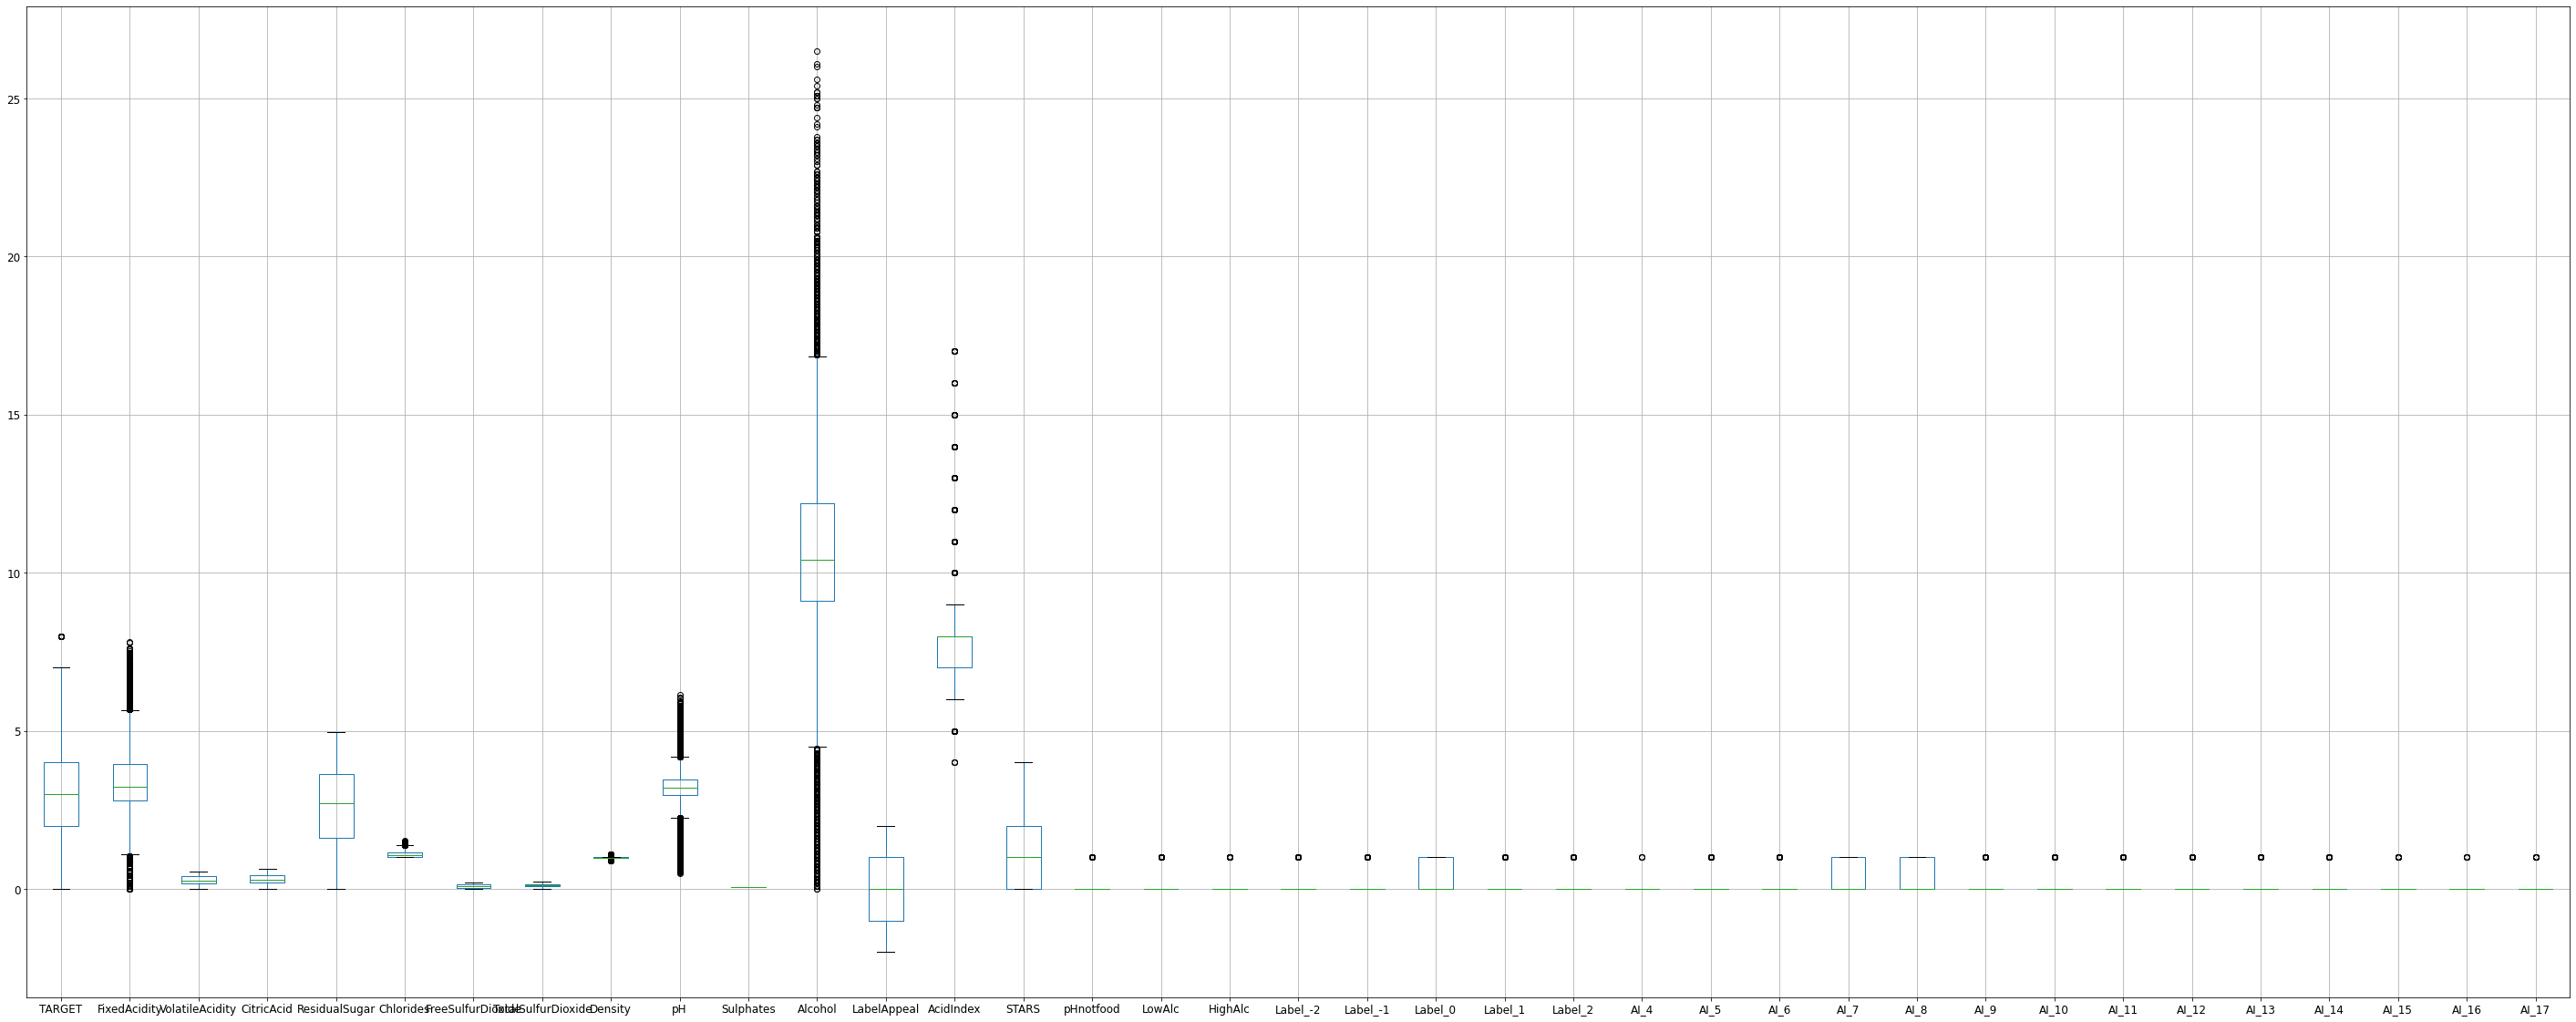

In [91]:
#create boxplots from all numeric values in the dataframe
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline
import matplotlib.pyplot as plt
df_prep.boxplot( figsize=(50,20))
plt.show()

We can see here that all boxplots are on roughly the same scales. Alcohol and PH still have many outliers, but we have addressed that issue with Dummy Variables. If we had more time, we may add dummy variables for Fixed Acidity as well.

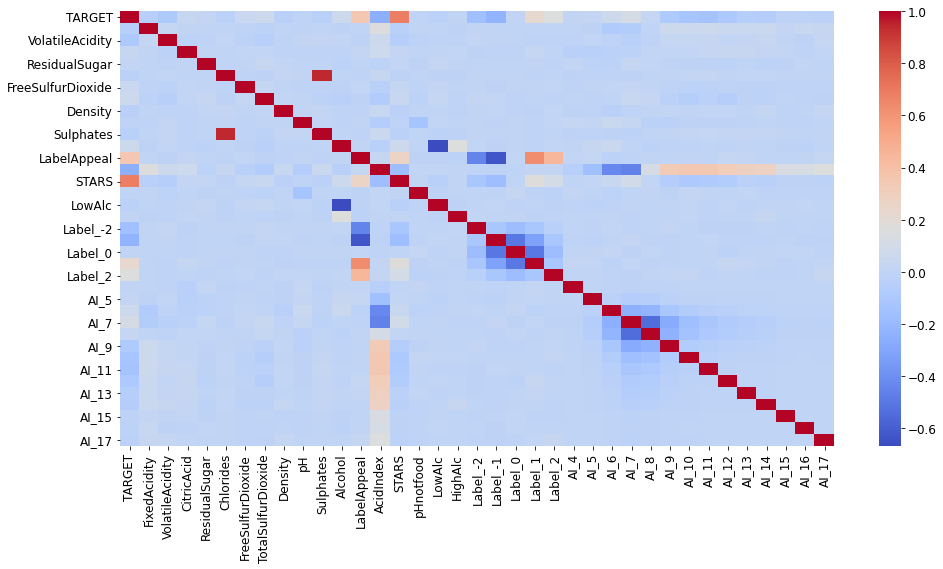

In [92]:
plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
sns.heatmap(df_prep.corr(),cmap='coolwarm',annot=False);

It is unclear how much value we have added here. There are more features correlated with TARGET, but they seem to be data pulled out of the previously correlated features.

## Conclusion

We were able to take this data set which had numerous proublems including from missing feature, skewed data, and vastly different scales. The data has been prepared in a way that we believe would result in significantly stronger predictive models.

Next Steps:
* Multi-Variate analyses, plotting features against each other to find patterns, and reanalyze those patterns after the data preperation stage.
* Create interaction features.

